# Lab 3: Supervised learning

### Practice notebook

Hello! This lab has an objective to teach how to run simple classification models, mainly using the scikit-learn library. In this lab, you will learn how to build the models on a given training set and then apply them for predicting the values on a test set. Here in this lab we will also show you how to derive accuracy, one of the most famous performance measures, on the test set. This lab contains the extra tasks to practice **after** completing the labs with videos.

- 3-3. Run more algorithms using scikit-learn
  - Adaboost
  - Logistic regression

- 3-4. Plotting the classifiers using matplotlib

## 3-3. Run more algorithms using scikit-learn


Now it's your turn. You will try two more scikit-learn classifiers: **Adaboost, Logistic Regression**. Throughout this section, you will use the same training and test dataset we prepared above in the lab session! If you want to create it again, you can run the code below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
RANDOM_SEED = 12345

In [2]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("sonar.all-data", header=None)
X = data.drop(60, axis=1)
y = data[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

#### Adaboost

As the name suggests, **Adaboost** is a kind of boosting algorithm. Therefore, it is greatly influenced by 1) the base classifier, 2) how many classifiers are ensembled, and 3) how much learning rate is given. The boosting algorithm is a technique that ensures high variance by combining weak learners with high bias. Scikit-learn has a decision tree with a height of 1 as the default classifier, but you can change it to a more complex classifier.

Step 1: You need to import the classifier from the library. You can find it from **ensemble** package.

In [3]:
from sklearn.ensemble import AdaBoostClassifier

Step 2: You need to create an instance by calling the class. In this stage, you need to specify your options. Do not forget to put our value `RANDOM_SEED` to random_state parameter to get the result that can be validated.

In [4]:
abc = AdaBoostClassifier(n_estimators=65, random_state=RANDOM_SEED)

Step 3: Now, you need to fit your training data into the model! You can run *fit* function.

In [5]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=65, random_state=12345)

Step 4: You can finally test your model by calling *score* function with your test dataset.

In [6]:
abc.score(X_test, y_test)

0.8571428571428571

It is not a graded assignment, but try to make the classifier having test accuracy more than 85%!

#### Logistic Regression

Logistic regression is somewhat similar to a standard regression, but it is used to solve the classification problem. As logistic regression has many solvers, scikit-learn provides various options to choose, but the performance is not that much different. You can modify penalty (regularization), and inverse regularization factor C (the same one as SVC) to increase the performance. 

Step 1: You need to import the classifier from the library. You can find it from the **linear_model** package.

In [7]:
from sklearn.linear_model import LogisticRegression

Step 2: You need to create an instance by calling the class. In this stage, you need to specify your options. Let's try to use different C values, and also different solvers, and different regularization strategies (penalty) if you want. Detailed information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

In [8]:
lr = LogisticRegression(C =17, penalty='l1', solver='liblinear') 

Step 3: Now, you need to fit your training data into the model! You can run *fit* function.

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(C=17, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Step 4: You can finally test your model by calling *score* function with your test dataset.

In [10]:
lr.score(X_test, y_test)

0.8095238095238095

It is not a graded assignment, but try to make the classifier having test accuracy more than 80%!

## 3-4. Plotting the classifiers using matplotlib

Now we can try to make a nice plotting function that can represent our decision boundary. For this task, we do not require you to write all functions from scratch. Here we already made some skeleton function, and you can try to fill in the blanks to complete the function.

In [11]:
def decision_boundary(X, y, model, **params):
    plt.figure()
    # choose only two columns we want to train and plot
    reduced_data = X[:, :2]
    
    # get instance of the model
    m = model(**params)
    
    # fir the model with two columns
    m.fit(reduced_data, y)
    
    h = .01
    
    # plot the decision boundary
    x1_min = reduced_data[:, 0].min() - 1
    x1_max = reduced_data[:, 0].max() + 1
    x2_min = reduced_data[:, 1].min() - 1
    x2_max = reduced_data[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    
    z = m.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

You can load the iris dataset to test from the scikit-learn library. 

In [12]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

Using the function, we can try plotting some decision boundaries of classifiers such as logistic regression or support vector machine.

#### Logistic regression

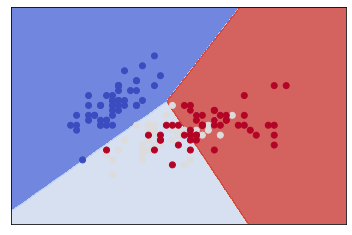

In [14]:
from sklearn.linear_model import LogisticRegression
decision_boundary(X_iris, y_iris, LogisticRegression)

#### Support vector machine

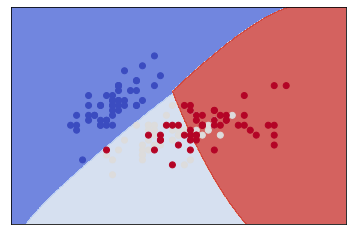

In [15]:
from sklearn.svm import SVC
decision_boundary(X_iris, y_iris, SVC)

This extra task is not graded. Try it with your own classifier!

# End of practice assignment 3